## Step-4


### A first glimpse at data.
Import necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("mcdonalds.csv")

In [6]:
# Check the column names
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

Let's check the number of rows and number of columns in the dataframe.

In [7]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe.")

There are 1453 rows and 15 columns in the dataframe.


In [8]:
# Let's take a look at the dataframe
df.head(6)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male


In [9]:
# Let's check for the null values
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

So, we don't have any null values in any column.

In [12]:
gender_summary = df.iloc[:,-1].value_counts(dropna=False)
yummy_summary = df.iloc[:,0].value_counts(dropna=False)
convenient_summary = df.iloc[:,1].value_counts(dropna=False)
spicy_summary = df.iloc[:,2].value_counts(dropna=False)
fattening_summary = df.iloc[:,3].value_counts(dropna=False)
greasy_summary = df.iloc[:,4].value_counts(dropna=False)
fast_summary = df.iloc[:,5].value_counts(dropna=False)
cheap_summary = df.iloc[:,6].value_counts(dropna=False)
tasty_summary = df.iloc[:,7].value_counts(dropna=False)
expensive_summary = df.iloc[:,8].value_counts(dropna=False)
healthy_summary = df.iloc[:,9].value_counts(dropna=False)
visit_frequency_summary = df.iloc[:,-2].value_counts(dropna=False)
age_summary = df.iloc[:,-3].describe().round(2)


print("Gender Summary:")
print(gender_summary)
print()

print("Yummy Summary:")
print(yummy_summary)
print()

print("Convenient Summary:")
print(convenient_summary)
print()

print("Spicy Summary:")
print(spicy_summary)
print()

print("Fattening Summary:")
print(fattening_summary)
print()

print("Greasy Summary:")
print(greasy_summary)
print()

print("Cheap Summary:")
print(cheap_summary)
print()

print("Tasty Summary:")
print(tasty_summary)
print()

print("Expensive Summary:")
print(expensive_summary)
print()

print("Healthy Summary:")
print(healthy_summary)
print()

print("Visit Frequency Summary:")
print(visit_frequency_summary)
print()

print("Age Summary:")
print(age_summary)
print()

Gender Summary:
Female    788
Male      665
Name: Gender, dtype: int64

Yummy Summary:
Yes    803
No     650
Name: yummy, dtype: int64

Convenient Summary:
Yes    1319
No      134
Name: convenient, dtype: int64

Spicy Summary:
No     1317
Yes     136
Name: spicy, dtype: int64

Fattening Summary:
Yes    1260
No      193
Name: fattening, dtype: int64

Greasy Summary:
Yes    765
No     688
Name: greasy, dtype: int64

Cheap Summary:
Yes    870
No     583
Name: cheap, dtype: int64

Tasty Summary:
Yes    936
No     517
Name: tasty, dtype: int64

Expensive Summary:
No     933
Yes    520
Name: expensive, dtype: int64

Healthy Summary:
No     1164
Yes     289
Name: healthy, dtype: int64

Visit Frequency Summary:
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

Age Summary:
count    1453.00
mean       44.60
std        14.22
min        18

### Descriptive Analysis

Let's visualize various graphs starting with age distribution.

<Axes: xlabel='Age', ylabel='Density'>

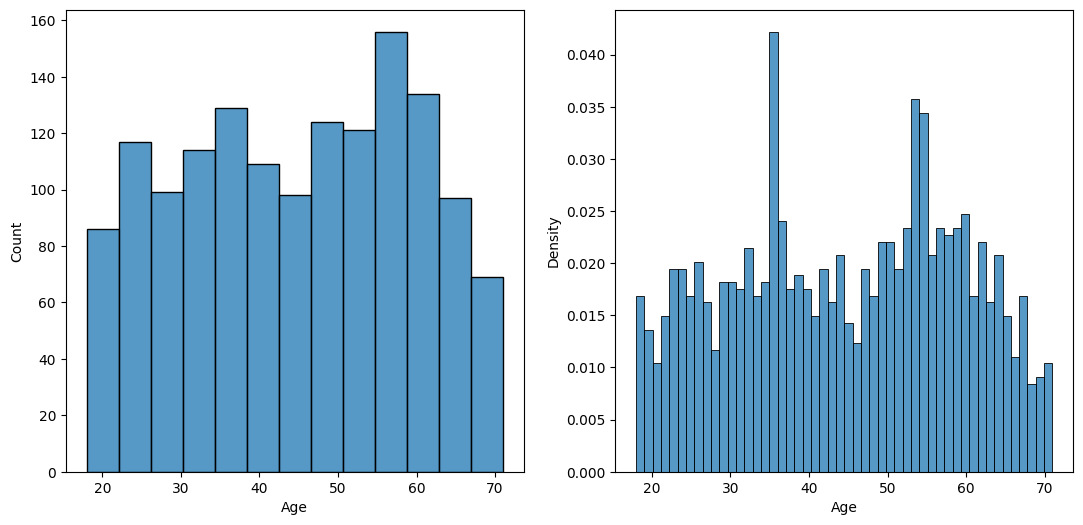

In [13]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(x="Age",data=df)
plt.subplot(1,2,2)
sns.histplot(x="Age",data=df,stat="density",bins=50)

We found that most of the people are of of around 55-60 years old. Let's confirm this by making the visualization more better.

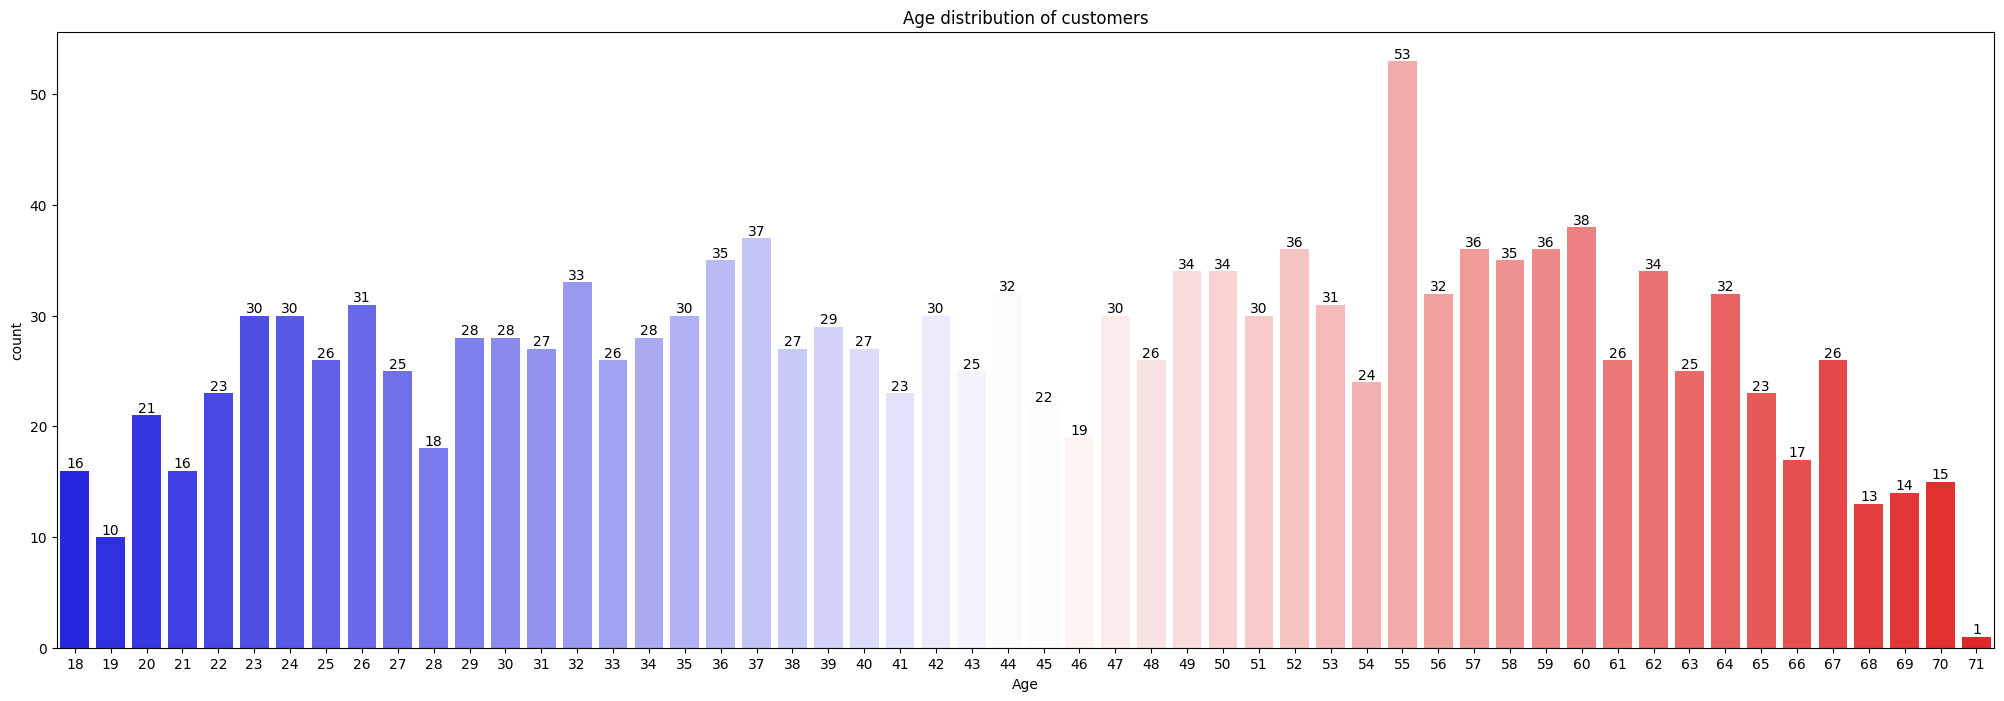

In [24]:
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Age'],palette = 'bwr')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()

So, we have cofirmred that it is highest for the age group of 55. 

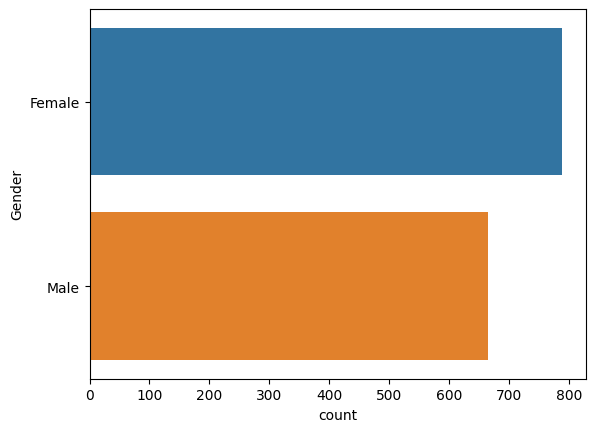

In [21]:
sns.countplot(data=df,y="Gender");

So, we can see there are more females than males. Now let's see the distribution age groups based on gender.

<ipython-input-27-6e6bcc865737>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df, x='Gender', y='Age',palette="pastel")


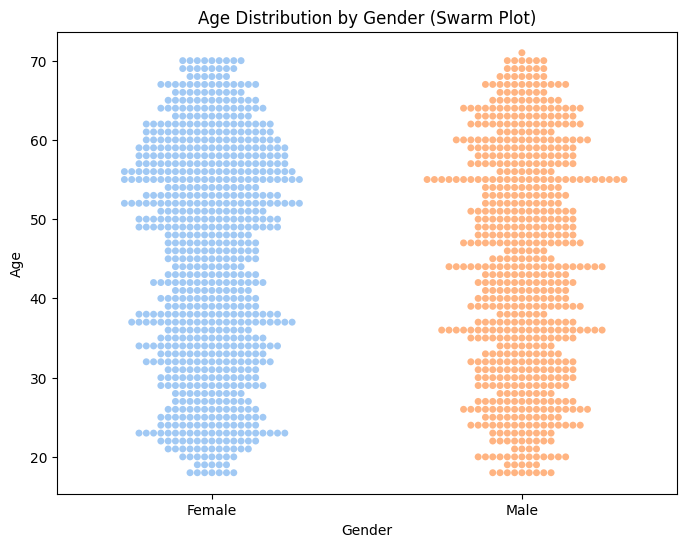

In [27]:
# Create a swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(data=df, x='Gender', y='Age',palette="pastel")
plt.title('Age Distribution by Gender (Swarm Plot)')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

As we can see feamle data is more densely distributed as compared to male. Now let's plot the similar swamplot against the likeliness with respect to age group.

<ipython-input-28-fff0799ec082>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Like", y="Age",data=df,


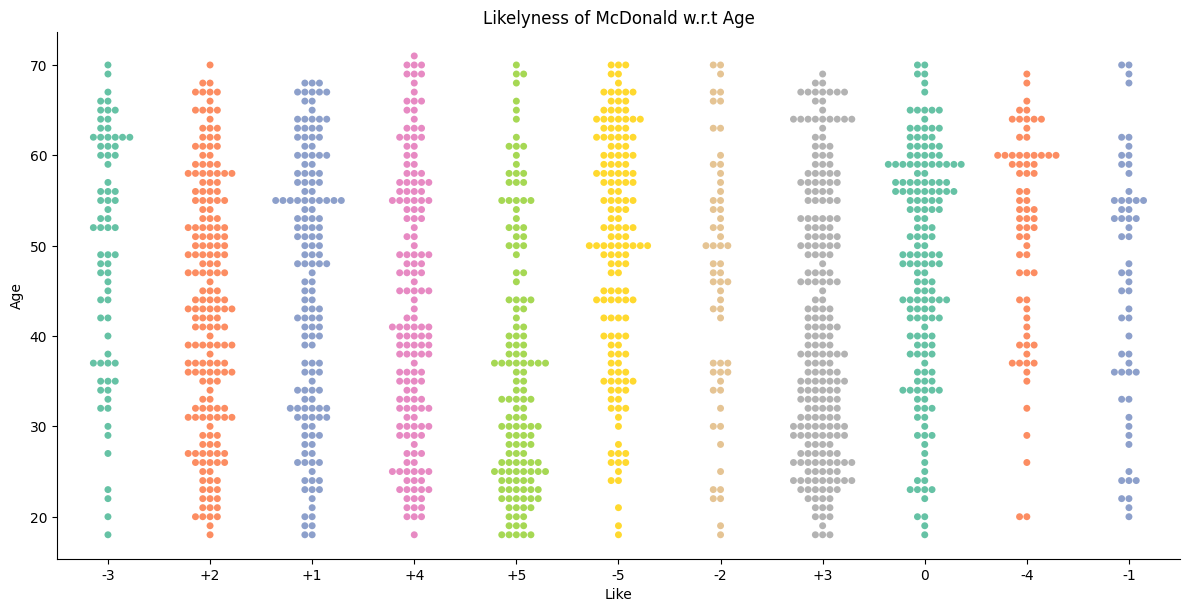

In [28]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height=6, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

Now let's see how many people says "Yes" to which criteria.

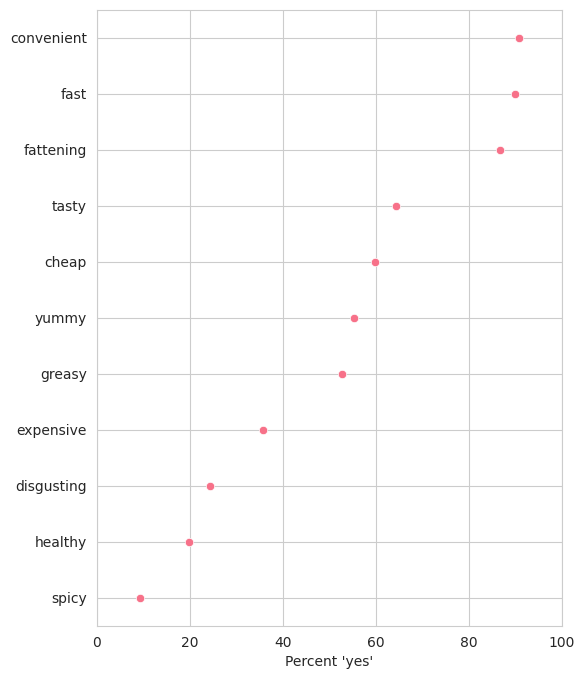

In [30]:
# Calculate the percentage of 'yes' values in columns 1 to 12
yes_percent = 100 * (df.iloc[:, :11] == 'Yes').mean()

# Sort the percentages in ascending order
sorted_percent = yes_percent.sort_values(ascending=False)

# Plotting the dot chart
plt.figure(figsize=(6, 8))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.scatterplot(x=sorted_percent.values, y=sorted_percent.index)

# Setting the x-axis label and limit
plt.xlabel("Percent 'yes'")
plt.xlim(0, 100)

plt.show()

So, as we can see most people have given "Yes" to the convenient, then followed by the fast and fattening.

### Preprocessing

First let's use sklearn label encoding to convert "Yes" to 1 and "No" to 0 for further processing of the data. 

In [31]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode the columns
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column].astype(str))

# Mapping of encoded values to original labels
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Display the mapping
print("Label Mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label}: {encoded_value}")

Label Mapping:
No: 0
Yes: 1


In [32]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


Now let's plot the countplot

In [39]:
import math

def plot_countplot_grid(df, columns):
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / 3)
    num_cols = min(num_plots, 3)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    fig.tight_layout()

    for i, column in enumerate(columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row][col] if num_rows > 1 else axes[col]

        sns.countplot(data=df, x=column, ax=ax)
        ax.set_title(column)
        ax.set_xlabel('')  

    # Remove empty subplots
    if num_plots < num_rows * num_cols:
        for i in range(num_plots, num_rows * num_cols):
            row = i // num_cols
            col = i % num_cols
            fig.delaxes(axes[row][col])

    plt.show()

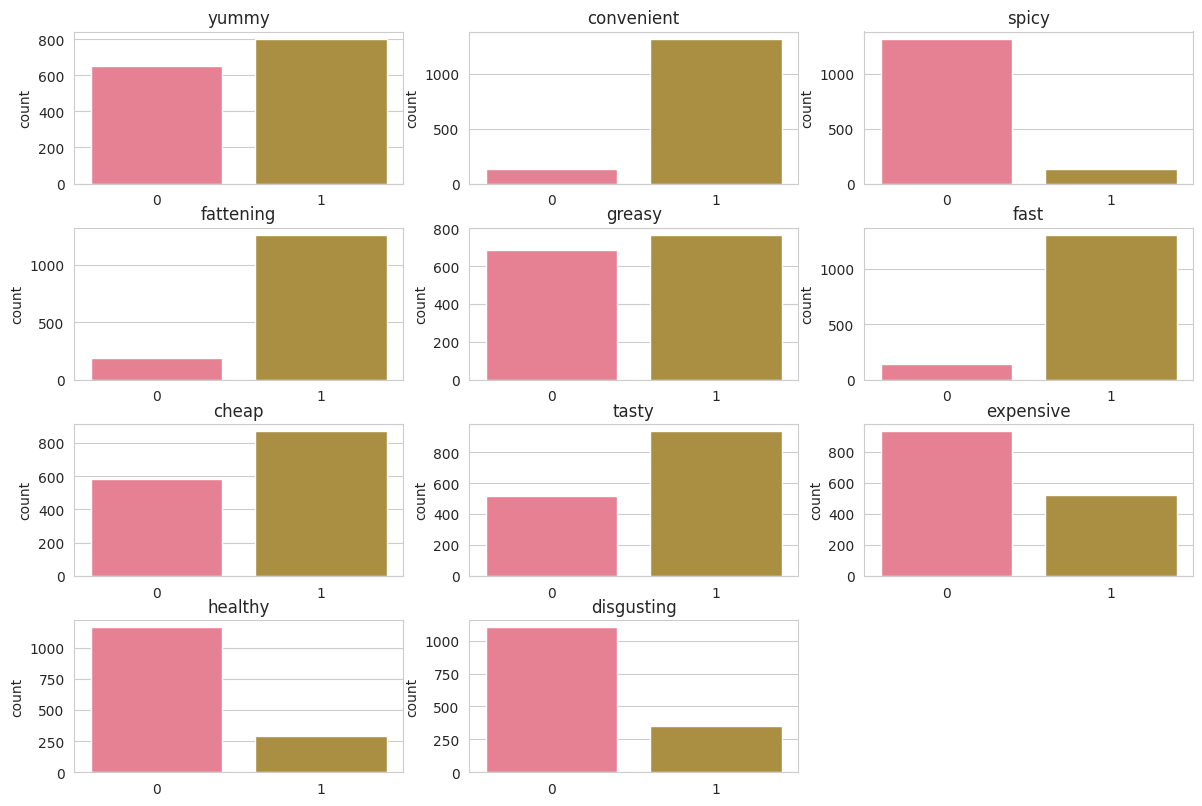

In [40]:
plot_countplot_grid(df,columns=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'])

Now perform standard scaler on this data. For this we only need to consider the numerical data. So, let's convert a separate dataframe of numerical data.

In [44]:
df_num = df[columns_to_encode]

In [45]:
df_num.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [46]:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
df_scaled = sc.fit_transform(df_num)

In [48]:
scaled_df = pd.DataFrame(df_scaled,columns=df.columns[:11])
scaled_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,-1.111479,0.318735,-0.321349,0.391375,-1.054476,0.332951,0.818605,-1.345528,1.339489,-0.498279,-0.566488
1,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,1.339489,-0.498279,-0.566488
2,-1.111479,0.318735,3.111884,0.391375,0.948339,0.332951,-1.221590,0.743203,1.339489,2.006908,-0.566488
3,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,-0.746553,-0.498279,1.765261
4,-1.111479,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,-1.345528,-0.746553,2.006908,-0.566488
...,...,...,...,...,...,...,...,...,...,...,...
1448,-1.111479,0.318735,-0.321349,0.391375,0.948339,-3.003446,-1.221590,-1.345528,1.339489,-0.498279,1.765261
1449,0.899702,0.318735,-0.321349,0.391375,-1.054476,-3.003446,0.818605,0.743203,-0.746553,2.006908,-0.566488
1450,0.899702,0.318735,-0.321349,0.391375,-1.054476,0.332951,-1.221590,0.743203,1.339489,-0.498279,-0.566488
1451,0.899702,0.318735,-0.321349,-2.555092,-1.054476,0.332951,0.818605,0.743203,-0.746553,2.006908,-0.566488


### Principal component analysis

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pc = pca.fit_transform(scaled_df)
pf = pd.DataFrame(data = pc, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144
...,...,...,...,...,...,...,...,...,...,...,...
1448,3.499105,1.069999,0.148971,-0.195977,0.787923,1.016536,-1.977414,0.049487,-0.964269,0.070579,0.155016
1449,-1.568786,0.899328,1.192503,-0.286497,2.234500,1.258306,-1.764159,-1.705500,-0.232987,-0.036497,0.039392
1450,-0.414275,1.810438,-1.071948,-0.901031,-0.750299,0.065975,0.720962,-0.397984,-0.344847,0.098558,0.118205
1451,-2.803630,0.562759,2.278887,0.083924,0.080147,-0.969368,-0.384558,0.604123,-0.211434,0.083127,0.077614


Now let's print the Proportion of Variance and Cumulative Proportion Of variance of PCA.

In [51]:
# Print the information for the first 20 principal components
num_components = 11
for i in range(num_components):
    print("Principal Component", i+1)
    print("Standard Deviation:", pca.explained_variance_[i]**0.5)
    print("Proportion of Variance:", pca.explained_variance_ratio_[i])
    print("Cumulative Proportion of Variance:", sum(pca.explained_variance_ratio_[:i+1]))
    print()

Principal Component 1
Standard Deviation: 1.677249585623524
Proportion of Variance: 0.2555663694195495
Cumulative Proportion of Variance: 0.2555663694195495

Principal Component 2
Standard Deviation: 1.27786842133065
Proportion of Variance: 0.14834762332752893
Cumulative Proportion of Variance: 0.40391399274707845

Principal Component 3
Standard Deviation: 1.1752065650831356
Proportion of Variance: 0.12546908611226035
Cumulative Proportion of Variance: 0.5293830788593388

Principal Component 4
Standard Deviation: 1.040053491580869
Proportion of Variance: 0.09826970889617445
Cumulative Proportion of Variance: 0.6276527877555133

Principal Component 5
Standard Deviation: 0.9586196420158758
Proportion of Variance: 0.08348356062198296
Cumulative Proportion of Variance: 0.7111363483774962

Principal Component 6
Standard Deviation: 0.8846127837500528
Proportion of Variance: 0.07109101898621496
Cumulative Proportion of Variance: 0.7822273673637111

Principal Component 7
Standard Deviation: 0.

The interpretation of the output is as follows: The matrix provides information about each principal component (PC), including its standard deviation, proportion of explained variance of the original variables, and cumulative proportion of explained variance. The cumulative proportion and proportion of explained variance are particularly important.

In this specific case, Principal Component 1 accounts for approximately one-fourth (25%) of the variance in the original data. Principal Component 2 explains about one-sevennth (15%) approx of the variance. When combined, these two components account for a total of 40% of the variation in the original data.

Overall, this information helps us understand the relative importance of each principal component in explaining the variability in the original data. The observation that the initial principal components have low variance suggests that all of the original items or survey questions are necessary as segmentation variables. They are not redundant, as each item contributes unique and valuable information to the analysis.

Now let's print the principal component according to the variable names.

In [53]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_num.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


Let's plot correlation matrix of the plot.

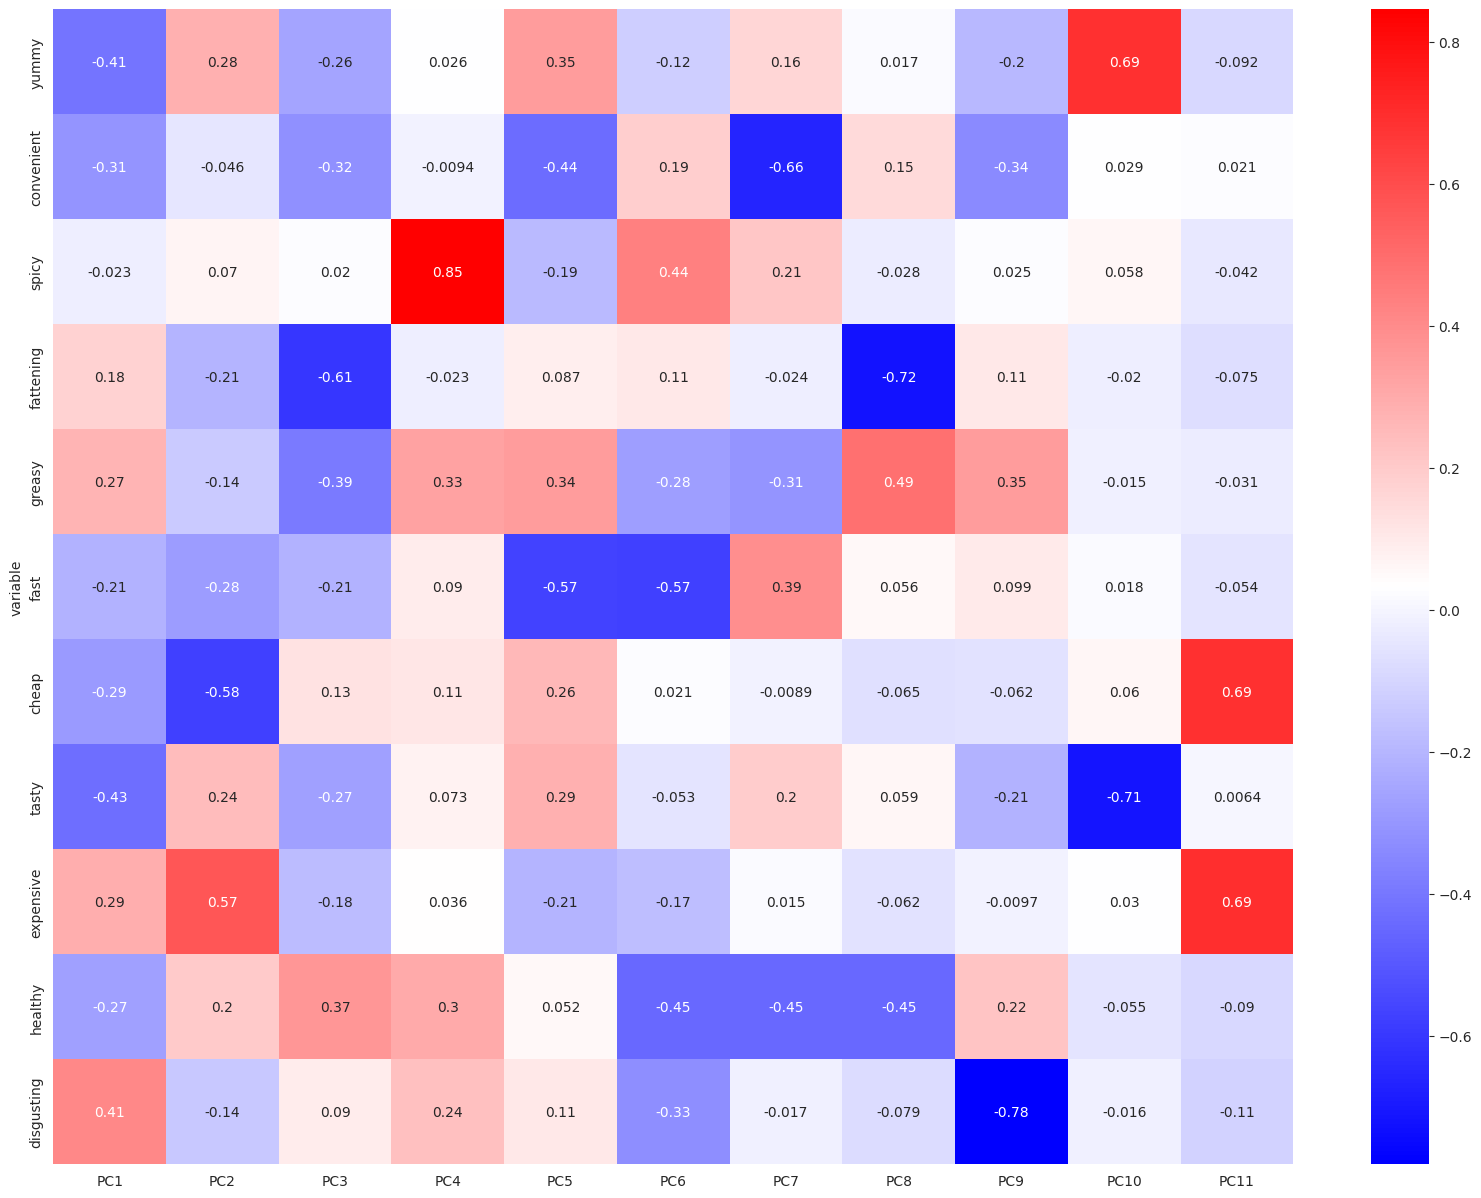

In [54]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='bwr')
plt.show()

So, now we have printed the correlation matrix of principal components with variables. Now let's plot the explained variance ratio.

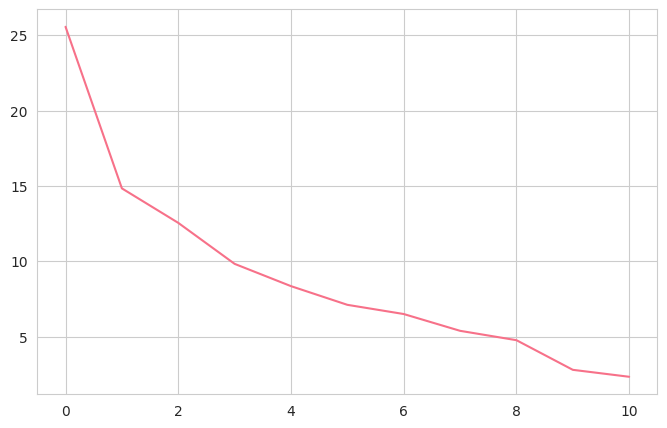

In [73]:
plt.figure(figsize=(8,5))
plt.plot(pca.explained_variance_ratio_*100);

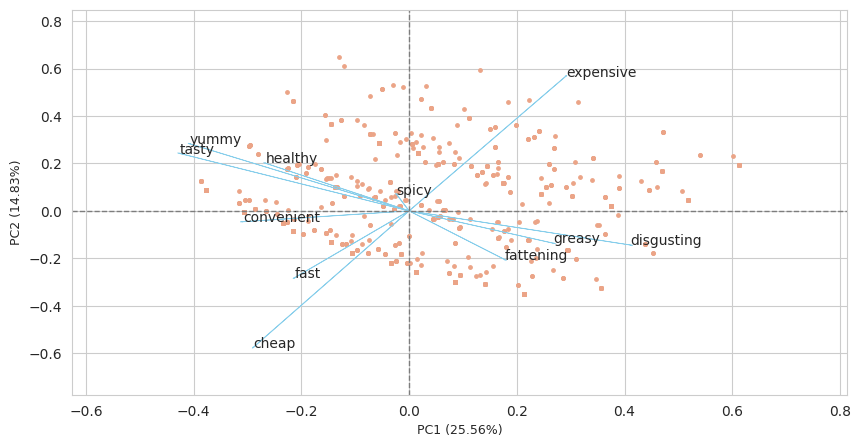

In [72]:
# get PC scores
pca_scores = PCA().fit_transform(df_scaled)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

## Step-5: Extracting Segments

Step 5 is where we extract segments. Here we will use standard k-means analysis. 

Let's make a function to decide the optimal number of clusters. Then we print the sum of sum of with in the cluster distances by the means of bar graph. 

In [74]:
from sklearn.cluster import KMeans
def elbow_method(data, max_clusters):
    within_cluster_sum_of_squares = []
    
    for num_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(data)
        within_cluster_sum_of_squares.append(kmeans.inertia_)
    
    return within_cluster_sum_of_squares

In [75]:
# Calculate sum of within-cluster distances using the elbow method
within_cluster_distances = elbow_method(df_num, max_clusters=10)

Now let's plot the graph.

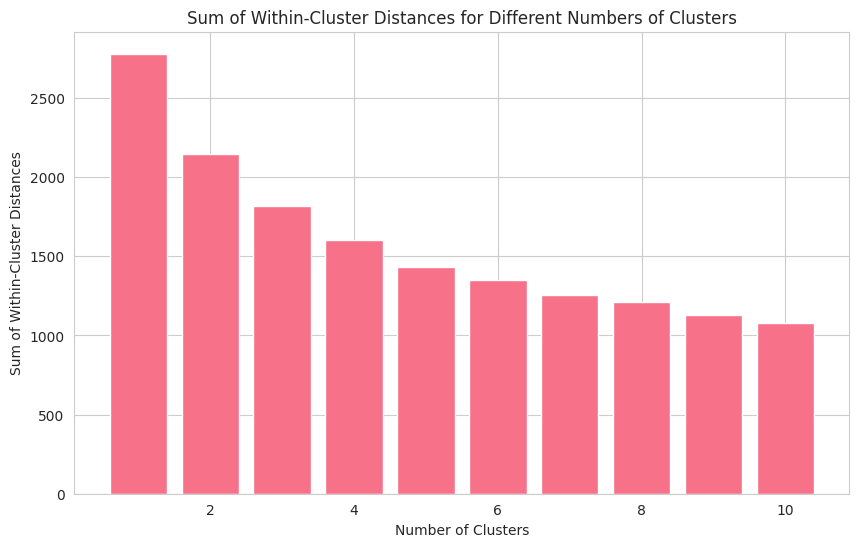

In [76]:
# Plot the sum of within-cluster distances on a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(within_cluster_distances) + 1), within_cluster_distances)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Within-Cluster Distances')
plt.title('Sum of Within-Cluster Distances for Different Numbers of Clusters')
plt.show()

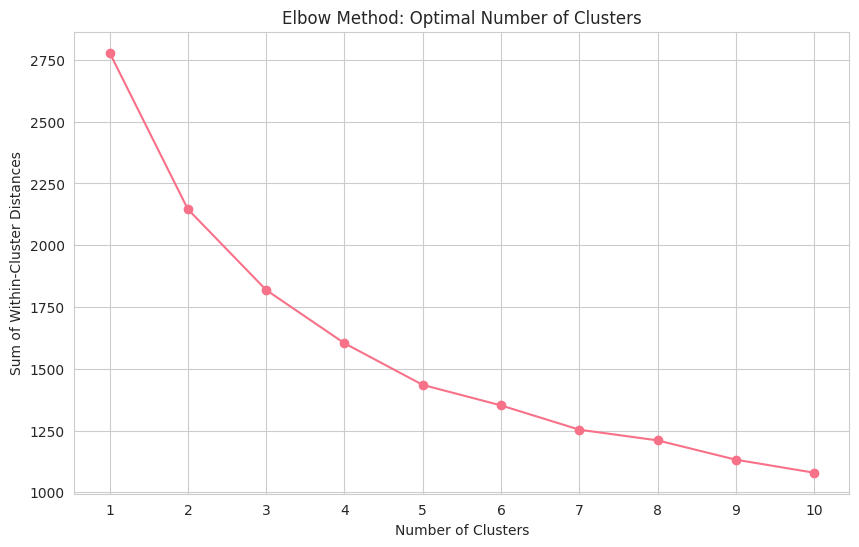

In [77]:
# Plot the elbow method graph to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(within_cluster_distances) + 1), within_cluster_distances, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Within-Cluster Distances')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xticks(range(1, len(within_cluster_distances) + 1))
plt.show()

So, for the above 4 clusters seems optimal. Hence we will proceed with 4 clusters. Let's perform the KMeans clusterin now.

In [79]:
#K-means clustering 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_num)
df['cluster_num'] = kmeans.labels_ #adding to df
print(kmeans.labels_) #Label assigned for each data point
print(kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[2 0 0 ... 0 1 3]
1603.0604440558923
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


Next we will see the cluster size. For this we will use collections module.

In [80]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

Now let's visualize the scatterplot of the visualization of the cluster.

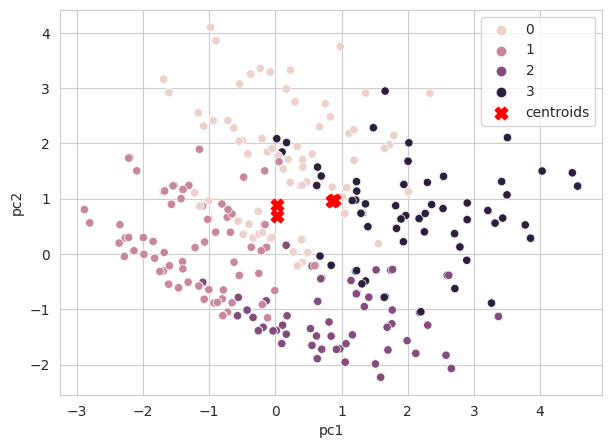

In [85]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

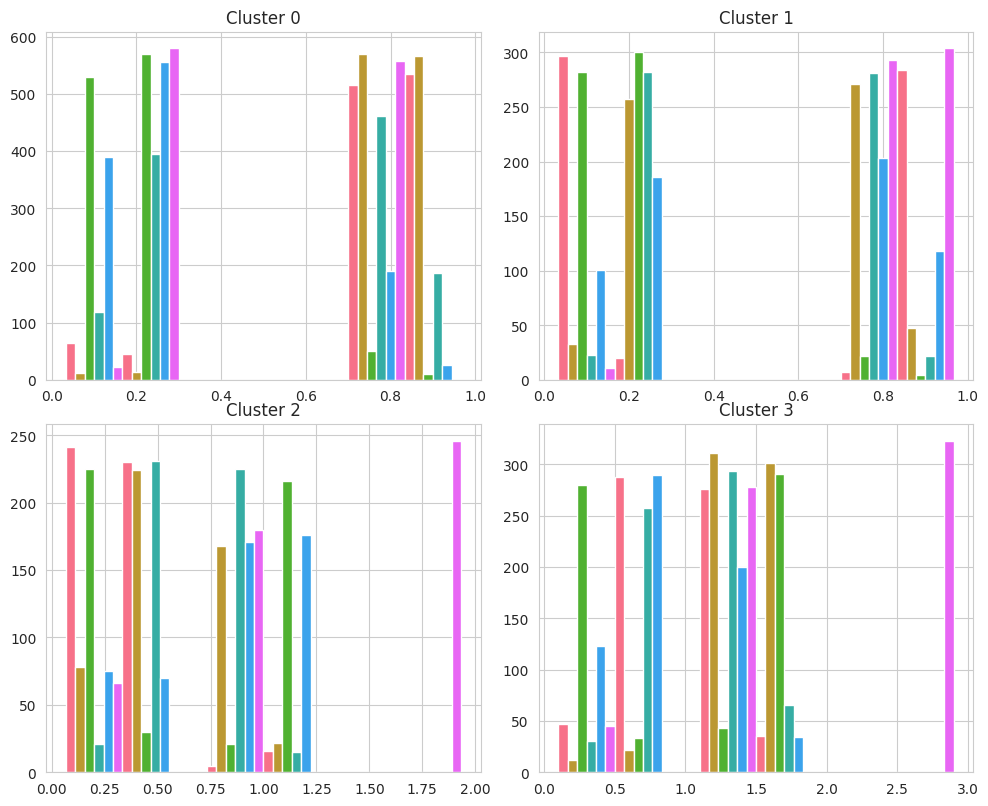

In [108]:
def plot_cluster_histograms(data, labels, num_clusters):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    fig.tight_layout()

    for cluster_label in range(num_clusters):
        row = cluster_label // 2
        col = cluster_label % 2
        ax = axes[row][col]

        cluster_data = data[labels == cluster_label]
        ax.hist(cluster_data,bins=3)
        ax.set_title(f'Cluster {cluster_label}')

    plt.show()

plot_cluster_histograms(df_num, kmeans.labels_, num_clusters=4)


Next we do hierarichal level clustering using dendrogram.

In [118]:
import scipy

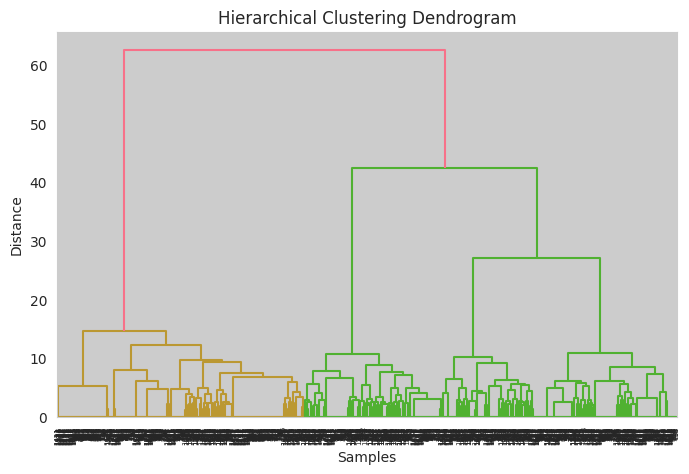

In [121]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Perform hierarchical clustering using linkage
base_k = 10
base_iter = 50
linkage_matrix = scipy.cluster.hierarchy.linkage(df_num, method='ward')

# Plot the dendrogram
plt.figure(figsize=(8,5))
dendrogram(linkage_matrix, leaf_rotation=90)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Let's plot the number of clusters using k-means.

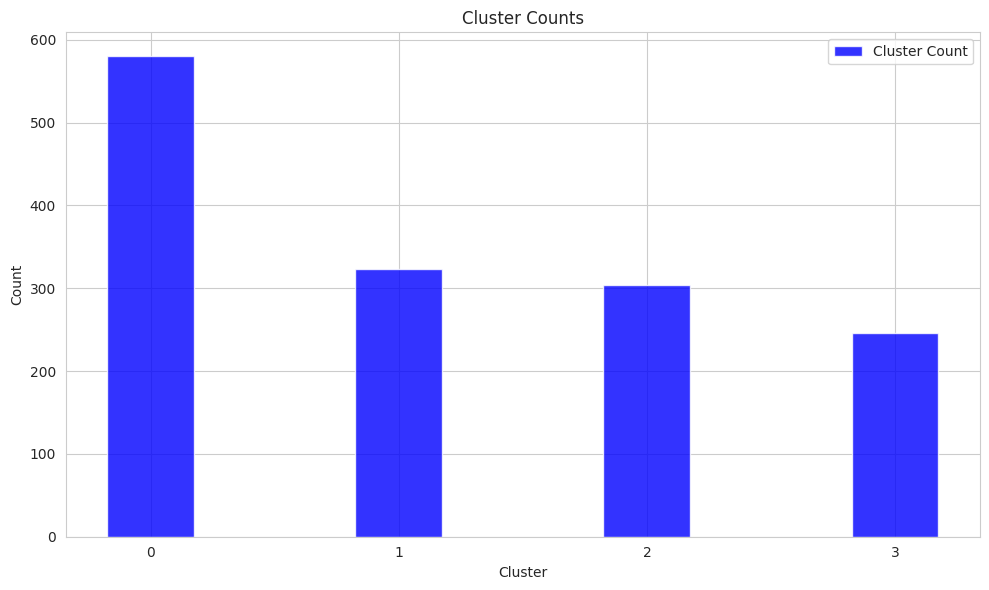

In [125]:
from sklearn.cluster import KMeans

# Specify the number of clusters
k = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(df_num)

# Count the number of samples in each cluster
cluster_counts = np.bincount(labels)

# Calculate the mean values for each cluster
cluster_means = df_num.groupby(labels).mean()

# Get the mean values for the specified number of clusters
selected_cluster_means = cluster_means.head(k)

# Get the cluster labels for the specified number of clusters
selected_cluster_labels = selected_cluster_means.index

# Get the count of samples for the specified number of clusters
selected_cluster_counts = cluster_counts[selected_cluster_labels]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(k)
bar_width = 0.35
opacity = 0.8

ax.bar(x, selected_cluster_counts, bar_width, alpha=opacity, color='b', label='Cluster Count')
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Cluster Counts')
ax.set_xticks(x)
ax.set_xticklabels(selected_cluster_labels)
ax.legend()

plt.tight_layout()
plt.show()


Now let's visualize the clusters along with cloumn names.

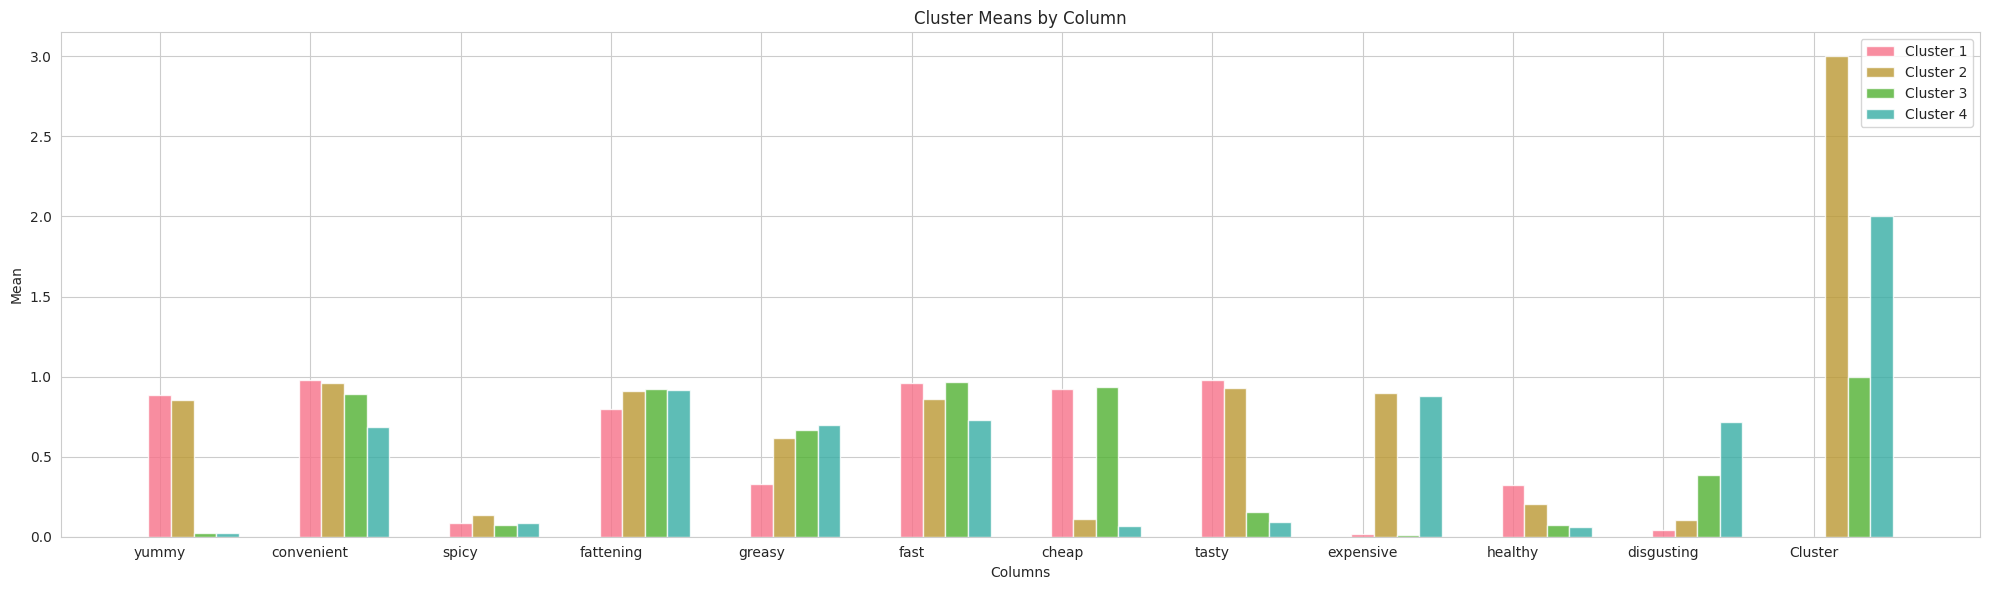

In [124]:
from sklearn.cluster import KMeans

# Specify the number of clusters
k = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(df_num)

# Count the number of samples in each cluster
cluster_counts = np.bincount(labels)

# Calculate the mean values for each column and cluster
cluster_means = df_num.groupby(labels).mean().T

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(20, 6))
x = np.arange(len(df_num.columns))
bar_width = 0.15
opacity = 0.8

for i in range(k):
    ax.bar(x + (i * bar_width), cluster_means[i], bar_width, alpha=opacity, label=f'Cluster {i+1}')

ax.set_xlabel('Columns')
ax.set_ylabel('Mean')
ax.set_title('Cluster Means by Column')
ax.set_xticks(x)
ax.set_xticklabels(df_num.columns)
ax.legend()

plt.tight_layout()
plt.show()